In [57]:
import matplotlib.pyplot as plt 
import pandas as pd

In [45]:
suspended = pd.read_excel("CBP02430_DATA.xlsx", sheet_name = 0, skiprows =2)
kicked = pd.read_excel("CBP02430_DATA.xlsx", sheet_name = 1, skiprows =2)
pd.DataFrame.describe(kicked)

,Date,Hansard ref,Member,Party,Reason for suspension,Period
count,58,58,58,58,59,59
unique,51,52,48,8,31,17
top,2021-09-09 00:00:00,Vol 700 cc500-506,Tam Dalyell,Lab,SOs relating to disorderly conduct,5 sitting days
freq,3,3,4,29,24,32


In [117]:
party_frequency = pd.crosstab(index=kicked["Party"],  # Make a crosstab
                     columns="count") 
party_frequency = party_frequency.rename(index={"Con": "Conservative",
                                  "DUP":"Democratic Unionist Party",
                                  "Ind": "Independent",
                                  "Lab": "Labour",
                                  "Lib Dem": "Liberal Democrats",
                                  "SNP": "Scottish National Party",
                                  "PC": "Plaid Cymru"})
pd.DataFrame.describe(party_frequency)

col_0,count
count,8.000000
mean,7.250000
std,9.647353
min,1.000000
25%,1.750000
50%,3.000000
75%,7.750000
max,29.000000


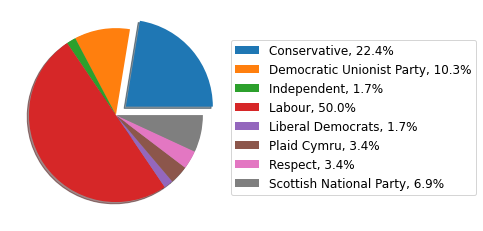

In [122]:
plot = party_frequency.plot.pie( y = "count", labels = None, explode = [.15, 0, 0, 0, 0, 0, 0, 0],
                                startangle=0, shadow=True)
plot.axes.get_yaxis().set_visible(False)
plot.axes.get_legend().set_visible(False)
total = party_frequency["count"].sum()
legend_labels = ['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(party_frequency.index, party_frequency.loc[:,"count"])]
plt.legend(
    loc='upper left',
    labels= legend_labels,
    prop={'size': 12},
    bbox_to_anchor=(1, 0.875)
)
